<a href="https://colab.research.google.com/github/Femer01/Femer01/blob/main/Text_Mining_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# reading the data into pandas Data Frame

In [ ]:
sentiments = pd.read_csv('sentiment_tweets3.csv')

# Exploring the data

In [ ]:
sentiments.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
# renaming the columns
sentiments.rename(columns={"label (depression result)": "depression"}, inplace=True)
sentiments.rename(columns={"message to examine": "text"}, inplace=True)

In [ ]:
sentiments.head()

,Index,text,depression
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
sentiments.shape

(10314, 3)

In [ ]:
# converting the target numerical varibale to categorical
sentiments['depression'] = sentiments['depression'].replace(0, 'Not Depressed')
sentiments['depression'] = sentiments['depression'].replace(1, 'Depressed')

In [ ]:
sentiments.head()

,Index,text,depression
0,106,just had a real good moment. i missssssssss hi...,Not Depressed
1,217,is reading manga http://plurk.com/p/mzp1e,Not Depressed
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed
3,288,@lapcat Need to send 'em to my accountant tomo...,Not Depressed
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed


In [ ]:
# dropping the 'Index' column
sentiments = sentiments.drop('Index', axis=1)

In [ ]:
# checking for class imbalnace

print("\n Data Labels")
print(sentiments.groupby('depression').count())



 Data Labels
               text
depression         
Depressed      2314
Not Depressed  8000


In [ ]:
count = sentiments["depression"].value_counts()
count

Not Depressed    8000
Depressed        2314
Name: depression, dtype: int64

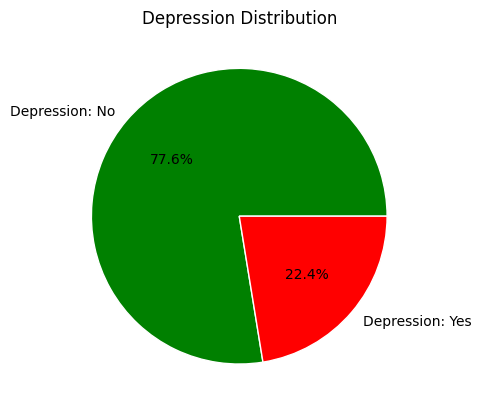

In [ ]:
#Visualizing the distribution of depression using pie function
plt.pie(count, labels=["Depression: No", "Depression: Yes"], autopct='%1.1f%%', colors=["green","red"],
        wedgeprops={"linewidth": 1, "edgecolor": "white"})
plt.title("Depression Distribution")
plt.show()

# Processing the data

In [ ]:
#defining the necessary functions
stop_words = nltk.corpus.stopwords.words('english')


In [ ]:
# Creating a function to apply for data preprocessing steps
def preprocess_txt(text):
  tokenized_doc = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_doc if word.lower() not in stop_words] #removing tokens
  stemmed_txt = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #stemming
  return stemmed_txt

In [ ]:
#applying the user defined function on the data set
sentiments['text'] = sentiments['text'].apply(preprocess_txt)

In [ ]:
sentiments.head()

,text,depression
0,"[real, good, moment, missssssssss, much]",Not Depressed
1,"[read, manga, http, plurk, com, p, mzp1e]",Not Depressed
2,"[comeagainjen, http, twitpic, com, 2y2lx, http...",Not Depressed
3,"[lapcat, need, send, 'em, account, tomorrow, o...",Not Depressed
4,"[add, myspac, myspac, com, lookthund]",Not Depressed


In [ ]:
#vectoring the tokenized text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(sentiments['text'].map(''.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,12625,12626,12627,12628,12629,12630,12631,12632,12633,12634
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking for missing values
missing_values = sentiments.isnull().sum()

#dislaying the result
print("Missing Values:")
print(missing_values)

Missing Values:
text          0
depression    0
dtype: int64


In [ ]:
# Splitting data set inot test and train sets using 20% test size
from sklearn.model_selection import train_test_split

y = sentiments['depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=90)


<Axes: xlabel='depression', ylabel='count'>

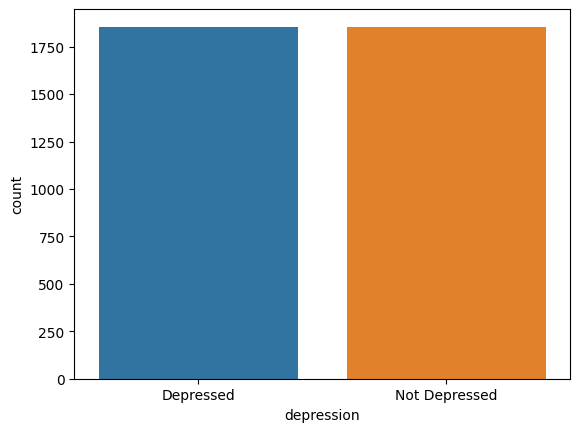

In [ ]:
# addressing the class imbalance in the target feature (depression)
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
X_train_u, y_train_u = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_u)

# Fitting and evaluating the model

In [ ]:
#Instantiating and fitting the Multinomial Naive Bayes into the processed data set
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_u, y_train_u)

MultinomialNB()

In [ ]:
#making prediction on the test data
y_pred = model.predict(X_test)

# Evaluating the model's performance
from sklearn import metrics

accuracy=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(accuracy))

# Confusion Matrix
cm=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('****************************************')

# Classification Report
result=metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.78


Confusion Matrix:
[[  27  432]
 [  15 1589]] 


****************************************
Classification Report:

               precision    recall  f1-score   support

    Depressed       0.64      0.06      0.11       459
Not Depressed       0.79      0.99      0.88      1604

     accuracy                           0.78      2063
    macro avg       0.71      0.52      0.49      2063
 weighted avg       0.75      0.78      0.71      2063



# Sentiment Analysis

# Loading review data set in Pandas Data Frame

In [ ]:
reviews = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Exploring the data

In [ ]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
#Checking for missing values
missing_values = reviews.isnull().sum()

#dislaying the result
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [ ]:
reviews.dropna()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
reviews.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
reviews.dropna(subset=['Review Text'], inplace=True)

In [ ]:
#Checking for missing values
missing_values = reviews.isnull().sum()

#dislaying the result
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64


In [ ]:
# Instantiating Sentiment Analyser

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [ ]:
# Extracting values form the data set and creating new columns
reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['Review Text']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['Review Text']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['Review Text']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['Review Text']]


In [ ]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,compound,neg,neu,pos
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8932,0.000,0.272,0.728
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9729,0.000,0.664,0.336
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9427,0.027,0.792,0.181
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5727,0.226,0.340,0.434
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9291,0.000,0.700,0.300


In [ ]:
reviews[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,22641.000000,22641.000000,22641.000000,22641.000000
mean,0.736025,0.034855,0.730975,0.234165
std,0.371650,0.047337,0.116168,0.123733
min,-0.956200,0.000000,0.000000,0.000000
25%,0.709600,0.000000,0.670000,0.148000
50%,0.889600,0.020000,0.745000,0.217000
75%,0.949600,0.055000,0.810000,0.300000
max,0.995900,0.655000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

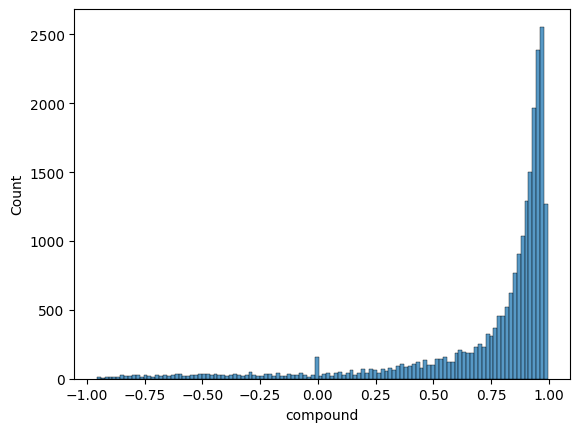

In [ ]:
#visualizing the distribution of compound scores
sns.histplot(reviews['compound'])

<Axes: xlabel='pos', ylabel='Count'>

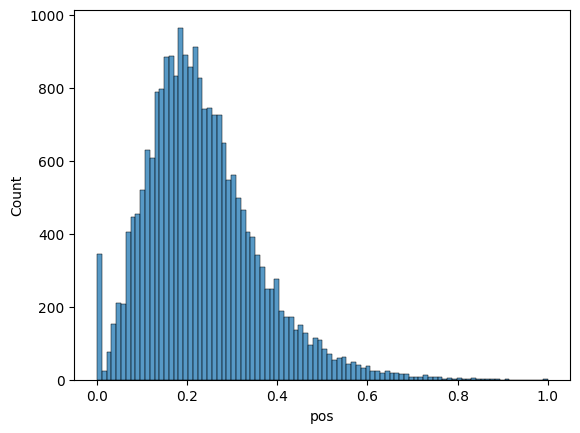

In [ ]:
#visualizing the distribution of positive scores
sns.histplot(reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

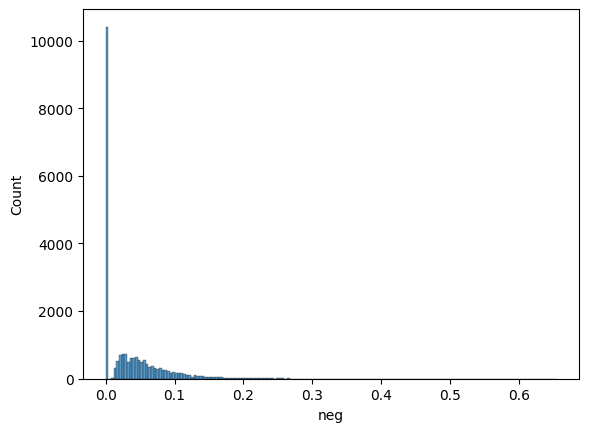

In [ ]:
#visualizing the distribution of negative scores
sns.histplot(reviews['neg'])

In [ ]:
# Examining how many negative reviews are there per product
(reviews['compound']<=0).groupby(reviews['Class Name']).sum()

Class Name
Blouses           189
Casual bottoms      0
Chemises            0
Dresses           437
Fine gauge         70
Intimates          11
Jackets            43
Jeans              71
Knits             313
Layering            8
Legwear             8
Lounge             56
Outerwear          27
Pants              88
Shorts             21
Skirts             54
Sleep              18
Sweaters          115
Swim               27
Trend              18
Name: compound, dtype: int64

In [ ]:
# calculating negative reviews as percentage of total reviews per product
percent_neg = pd.DataFrame((reviews['compound']<=0).groupby(reviews['Class Name']).sum()
                    /reviews['Class Name'].groupby(reviews['Class Name']).count()*100,
                    columns=['% Negative Reviews']).sort_values(by='% Negative Reviews')

percent_neg


,% Negative Reviews
Class Name,
Casual bottoms,0.000000
Chemises,0.000000
Legwear,5.063291
Skirts,5.980066
Layering,6.060606
Jackets,6.295754
Blouses,6.335903
Jeans,6.431159
Pants,6.518519


In [ ]:
percent_neg.head()

,% Negative Reviews
Class Name,
Casual bottoms,0.000000
Chemises,0.000000
Legwear,5.063291
Skirts,5.980066
Layering,6.060606


In [ ]:
percent_neg.rename(columns={'Name': 'Class Name', 'Negative': '% Negative Reviews'}, inplace=True)

percent_neg.head()

,% Negative Reviews
Class Name,
Casual bottoms,0.000000
Chemises,0.000000
Legwear,5.063291
Skirts,5.980066
Layering,6.060606


In [ ]:
percent_neg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Casual bottoms to Trend
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   % Negative Reviews  20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes


In [ ]:
#Processing data for wordcloud visualization using earlier user defined function specifically on 'Trend'

reviews['processed_review'] = reviews['Review Text'].apply(preprocess_txt)

reviews_positive_subset = reviews.loc[(reviews['Class Name']=='Trend') & (reviews['compound']>0),:]

reviews_negative_subset = reviews.loc[(reviews['Class Name']=='Trend') & (reviews['compound']<=0),:]

reviews_negative_subset.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,compound,neg,neu,pos,processed_review
845,845,548,38,NaN,Unusual color. expensive even on sale.,5,1,0,General,Trend,Trend,0.0000,0.000,1.000,0.000,"[unusu, color, expens, even, sale]"
1910,1910,1146,66,Odd fit,I was excited to try something by this designe...,3,1,10,General,Trend,Trend,-0.7825,0.119,0.829,0.052,"[excit, tri, someth, design, decid, order, siz..."
2915,2915,573,41,Bummer,"My first complaint is, this dress is pinned ba...",3,0,2,General Petite,Trend,Trend,-0.4990,0.082,0.876,0.041,"[first, complaint, dress, pin, back, obvious, ..."
3975,3975,1147,36,Great design,The top is totally see through and fabric some...,2,0,2,General,Trend,Trend,-0.3699,0.124,0.786,0.090,"[top, total, see, fabric, itchi, also, feel, c..."
4806,4806,1145,35,Huge,I like my dresses oversized but this one is ri...,2,0,2,General,Trend,Trend,-0.0925,0.174,0.681,0.145,"[like, dress, overs, one, ridicul, serious, un..."


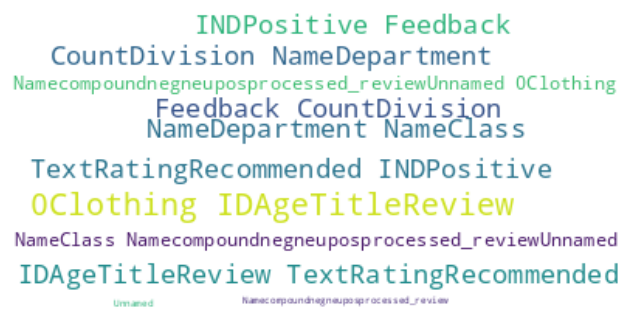

In [ ]:
#Generating wordcloud of words from negative reviews for 'Sweaters' product

neg_token = [word for review in reviews_negative_subset['processed_review'] for word in reviews]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ''.join(neg_token))

#Displaying the generated image:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

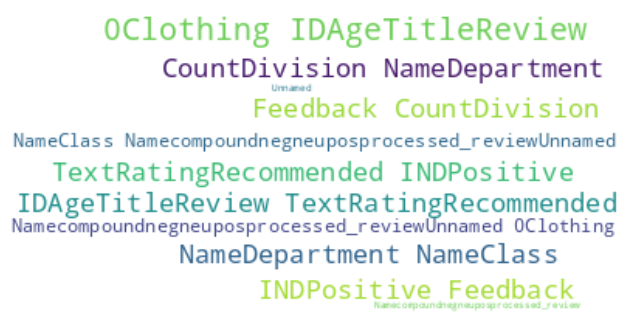

In [ ]:
#Generating wordcloud of words from positive reviews for 'Trend' product

pos_token = [word for review in reviews_positive_subset['processed_review'] for word in reviews]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ''.join(pos_token))

#Displaying the generated image:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Using nltk FreqDist to visialize the positive reviews

from nltk.probability import FreqDist

pos_fqd = FreqDist(pos_token)

pos_fqd.tabulate(10)

             Unnamed: 0             Clothing ID                     Age                   Title             Review Text                  Rating         Recommended IND Positive Feedback Count           Division Name         Department Name 
                   1265                    1265                    1265                    1265                    1265                    1265                    1265                    1265                    1265                    1265 


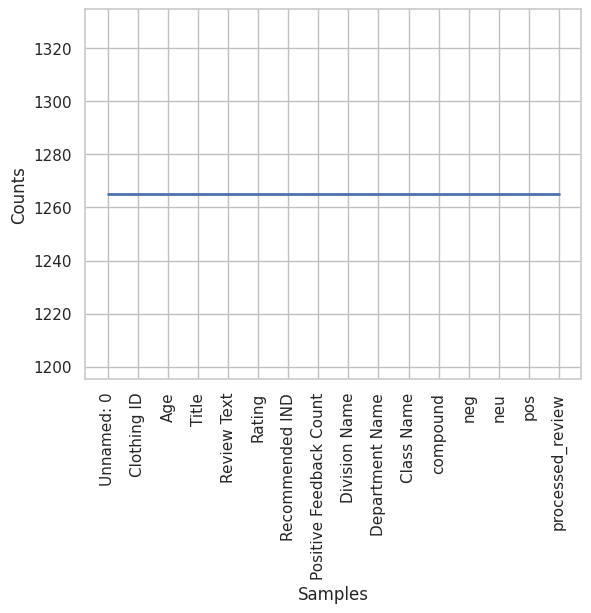

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
pos_fqd.plot(30)